# IMPORT

In [ ]:
# imports cruciais
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as plt
import seaborn as srn
import statistics as sts

# SARIMA
from statsmodels.tsa.seasonal import seasonal_decompose

# datetime
from datetime import datetime

#registro de converters para uso do matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# leitura
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/consorciadosjovens.csv", sep=";")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42492 entries, 0 to 42491
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   DT_Alocacao      42492 non-null  object
 1    CPF / CNPJ      42492 non-null  int64 
 2    NM_Consorciado  42492 non-null  object
 3    DT_Nascimento   38729 non-null  object
 4    ST_SEXO         42492 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.6+ MB


# INFORMAÇÕES BÁSICAS

In [ ]:
print('Contagem\n',round(df.groupby([' CPF / CNPJ']).count()).sum())
# PRECISA CONVERTER O FORMATO -- print('Contagem Distinta\n',round(df.groupby(['CPF / CNPJ']).unique()).sum())

Contagem
 DT_Alocacao        42492
 NM_Consorciado    42492
 DT_Nascimento     38729
 ST_SEXO           42492
dtype: int64


In [ ]:
df.isnull().sum()

,0
DT_Alocacao,0
CPF / CNPJ,0
NM_Consorciado,0
DT_Nascimento,3763
ST_SEXO,0


In [ ]:
print('Tamanho da Tabela',df.shape)

Tamanho da Tabela (42492, 5)


In [ ]:
df.head()

,DT_Alocacao,CPF / CNPJ,NM_Consorciado,DT_Nascimento,ST_SEXO
0,2019-01-02 00:00:00.000,32531085890,NELSON RODRIGO CARDOSO,1985-03-02 00:00:00.000,MASCULINO
1,2019-01-02 00:00:00.000,33387333803,JOÃO PANCIANO DA COSTA JUNIOR,1984-06-27 00:00:00.000,MASCULINO
2,2019-01-02 00:00:00.000,33020889000128,MARLI RODRIGUES PEREIRA 31569951268,NaN,PESSOA JURIDICA
3,2019-01-02 00:00:00.000,77516567272,MARIA SALETE PEREIRA DA SILVA,1982-02-07 00:00:00.000,FEMININO
4,2019-01-02 00:00:00.000,33117438653,FERNANDO SILVA DE BARROS,1959-02-24 00:00:00.000,MASCULINO


In [ ]:
df.tail()

,DT_Alocacao,CPF / CNPJ,NM_Consorciado,DT_Nascimento,ST_SEXO
42487,2024-09-10 00:00:00.000,40731615808,ARIADNI DA SILVA LEITE,1992-04-30 00:00:00.000,FEMININO
42488,2024-09-10 00:00:00.000,80486819515,VANIA CAMILO DE JESUS,1980-02-03 00:00:00.000,FEMININO
42489,2024-09-10 00:00:00.000,27069732856,PATRICIA SILVA DOS ANJOS DE JESUS,1978-10-12 00:00:00.000,FEMININO
42490,2024-09-10 00:00:00.000,33078095000115,RODRIGO ALMEIDA ABRANTES,NaN,PESSOA JURIDICA
42491,2024-09-10 00:00:00.000,46179249000107,MILA AGRONEGOCIOS LTDA,NaN,PESSOA JURIDICA


In [ ]:
print(df.dtypes)

DT_Alocacao        object
 CPF / CNPJ         int64
 NM_Consorciado    object
 DT_Nascimento     object
 ST_SEXO           object
dtype: object


# CONVERSÃO

In [ ]:
#df.dropna(inplace=True) # drop de linhas ou colunas
df[' DT_Nascimento'] = pd.to_datetime(df[' DT_Nascimento'])

# Supondo que a coluna se chame 'data_hora'
df['DT_Alocacao'] = pd.to_datetime(df['DT_Alocacao'], format='%Y-%m-%d %H:%M:%S.%f')
df[' DT_Nascimento'] = pd.to_datetime(df[' DT_Nascimento'], format='%Y-%m-%d %H:%M:%S.%f')

# Opcional: Salvar o DataFrame com as datas convertidas de volta para CSV
# df.to_csv('seu_arquivo_convertido.csv', index=False)

In [ ]:
hoje = datetime.now()

# Função para calcular a idade
def calcular_idade(data_nascimento):
    idade = hoje.year - data_nascimento.year - ((hoje.month, hoje.day) < (data_nascimento.month, data_nascimento.day))
    return idade

# Aplique a função à coluna de datas de nascimento
df['Idade'] = df[' DT_Nascimento'].apply(calcular_idade)

# Passo 4: Salve o DataFrame atualizado em um novo arquivo CSV (opcional)
# df.to_csv('arquivo_atualizado.csv', index=False)

print(df)

      DT_Alocacao      CPF / CNPJ                       NM_Consorciado  \
0      2019-01-02     32531085890               NELSON RODRIGO CARDOSO   
1      2019-01-02     33387333803        JOÃO PANCIANO DA COSTA JUNIOR   
2      2019-01-02  33020889000128  MARLI RODRIGUES PEREIRA 31569951268   
3      2019-01-02     77516567272        MARIA SALETE PEREIRA DA SILVA   
4      2019-01-02     33117438653             FERNANDO SILVA DE BARROS   
...           ...             ...                                  ...   
42487  2024-09-10     40731615808               ARIADNI DA SILVA LEITE   
42488  2024-09-10     80486819515                VANIA CAMILO DE JESUS   
42489  2024-09-10     27069732856    PATRICIA SILVA DOS ANJOS DE JESUS   
42490  2024-09-10  33078095000115             RODRIGO ALMEIDA ABRANTES   
42491  2024-09-10  46179249000107               MILA AGRONEGOCIOS LTDA   

       DT_Nascimento          ST_SEXO  Idade  
0         1985-03-02        MASCULINO   39.0  
1         1984-06

# INDEX

In [ ]:
df.loc[:,'DT_Alocacao']

#df['DT_Alocacao'] = pd.to_datetime(df['DT_Alocacao'])

df.set_index('DT_Alocacao',inplace=True)
df

print(df.index)

DatetimeIndex(['2019-01-02', '2019-01-02', '2019-01-02', '2019-01-02',
               '2019-01-02', '2019-01-02', '2019-01-02', '2019-01-02',
               '2019-01-02', '2019-01-02',
               ...
               '2024-09-10', '2024-09-10', '2024-09-10', '2024-09-10',
               '2024-09-10', '2024-09-10', '2024-09-10', '2024-09-10',
               '2024-09-10', '2024-09-10'],
              dtype='datetime64[ns]', name='DT_Alocacao', length=42492, freq=None)


In [ ]:
df

,CPF / CNPJ,NM_Consorciado,DT_Nascimento,ST_SEXO,Idade
DT_Alocacao,,,,,
2019-01-02,32531085890,NELSON RODRIGO CARDOSO,1985-03-02,MASCULINO,39.0
2019-01-02,33387333803,JOÃO PANCIANO DA COSTA JUNIOR,1984-06-27,MASCULINO,40.0
2019-01-02,33020889000128,MARLI RODRIGUES PEREIRA 31569951268,NaT,PESSOA JURIDICA,NaN
2019-01-02,77516567272,MARIA SALETE PEREIRA DA SILVA,1982-02-07,FEMININO,42.0
2019-01-02,33117438653,FERNANDO SILVA DE BARROS,1959-02-24,MASCULINO,65.0
...,...,...,...,...,...
2024-09-10,40731615808,ARIADNI DA SILVA LEITE,1992-04-30,FEMININO,32.0
2024-09-10,80486819515,VANIA CAMILO DE JESUS,1980-02-03,FEMININO,44.0
2024-09-10,27069732856,PATRICIA SILVA DOS ANJOS DE JESUS,1978-10-12,FEMININO,45.0


# GRÁFICOS

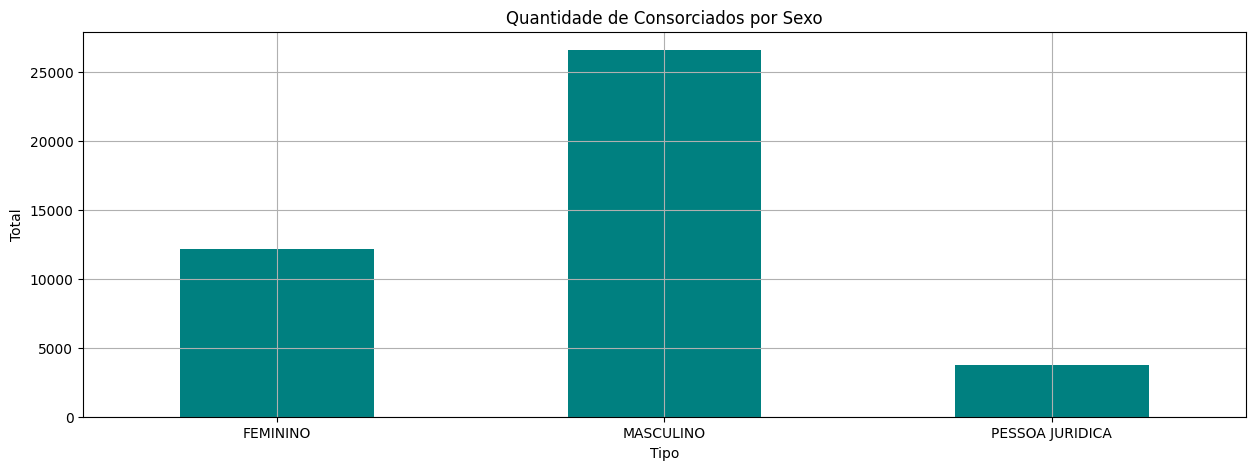

In [ ]:
s = df.groupby([' ST_SEXO']).size()
s

s.plot.bar(figsize=(15,5), rot=0, color = 'teal', grid=True)
plt.title("Quantidade de Consorciados por Sexo")
plt.xlabel("Tipo")
plt.ylabel("Total")
plt.show()

Text(0.5, 1.0, 'Histograma')

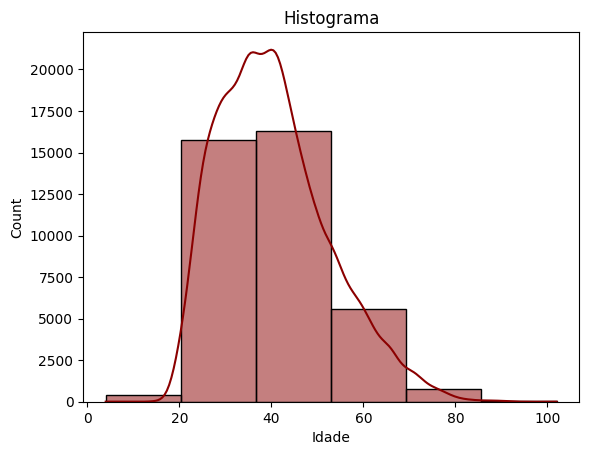

In [ ]:
srn.histplot(df['Idade'],kde=True, bins=6, color='darkred').set_title('Histograma')

In [ ]:
df.fillna(sts.median(df['Idade']), inplace=True)

mediana = sts.median(df['Idade'])
df.loc[df['Idade']<16] = mediana
df.loc[df['Idade']>60] = mediana

Text(0.5, 1.0, 'Histograma')

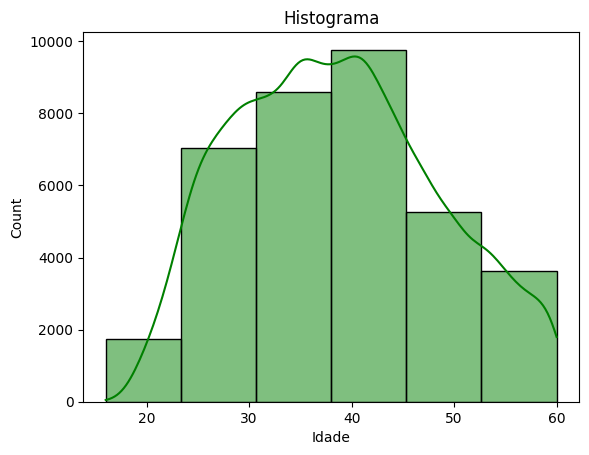

In [ ]:
srn.histplot(df['Idade'], kde=True, bins=6, color='green').set_title('Histograma')

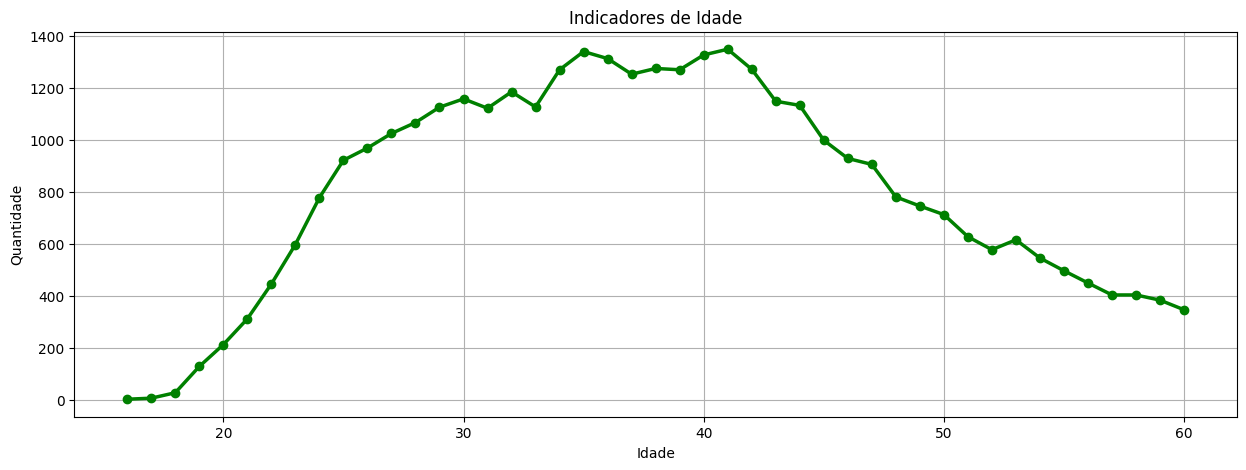

In [ ]:
i = df.groupby(['Idade']).size()
i

i.plot(style='-o' , linewidth=2.5, color='green', figsize=(15,5), grid=True)
plt.title("Indicadores de Idade")
plt.xlabel("Idade")
plt.ylabel("Quantidade")
plt.show()

In [ ]:
# Converter os valores da coluna 'CPF / CNPJ' para strings
df[' CPF / CNPJ'] = df[' CPF / CNPJ'].astype(str)

# Obter valores únicos e contar
numero_de_valores_unicos = len(df[' CPF / CNPJ'].unique())

# Formatar a saída
mensagem = f"{numero_de_valores_unicos} Consorciados"
print(mensagem)

34975 Consorciados


In [ ]:
print(df.dtypes)

 CPF / CNPJ                object
 NM_Consorciado            object
 DT_Nascimento     datetime64[ns]
 ST_SEXO                   object
Idade                     float64
dtype: object


# SÉRIES TEMPORAIS

In [ ]:
# Cria uma série temporal com a contagem de ocorrências de 'CPF / CNPJ' por mês.
# Primeiro, acessamos a coluna 'CPF / CNPJ' do DataFrame.
# Em seguida, reamostramos os dados para uma frequência mensal usando 'resample('M')'.
# Finalmente, contamos o número de entradas para cada período mensal com '.count()'.
# O resultado é uma série temporal onde o índice é o período mensal e os valores são as contagens.

ts = df[' CPF / CNPJ'].resample('M').count()
ts


,CPF / CNPJ
DT_Alocacao,
2019-01-31,507
2019-02-28,572
2019-03-31,505
2019-04-30,675
2019-05-31,625
...,...
2024-05-31,559
2024-06-30,559
2024-07-31,630


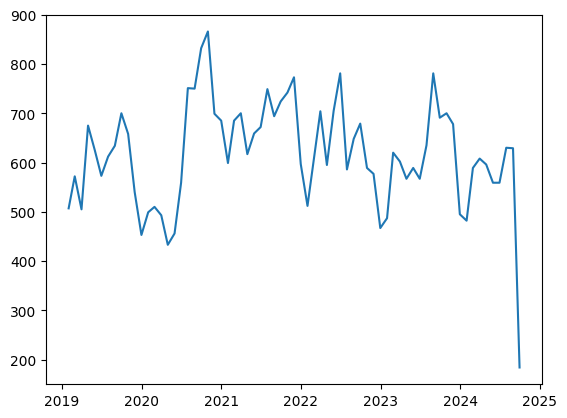

In [ ]:
# Visualização da série temporal completa
plt.plot(ts)

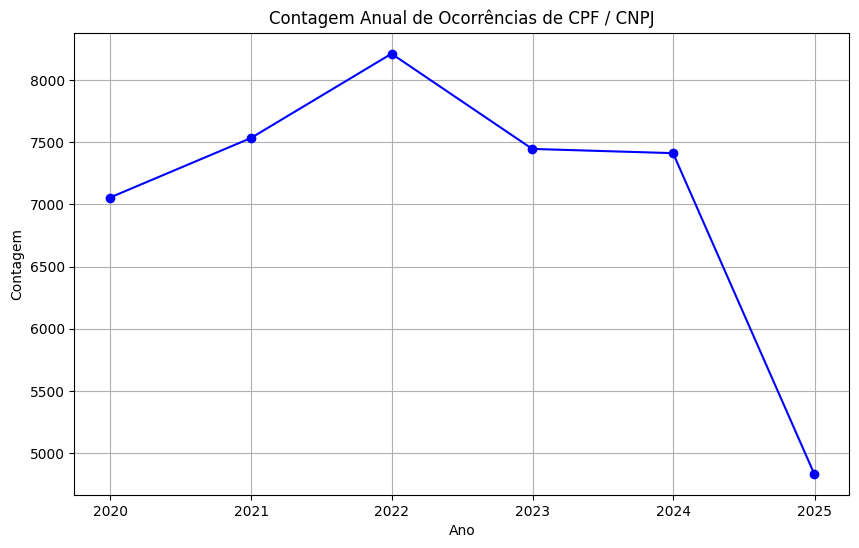

,CPF / CNPJ
DT_Alocacao,
2019-12-31,7054
2020-12-31,7533
2021-12-31,8211
2022-12-31,7446
2023-12-31,7412
2024-12-31,4836


In [ ]:
# Reamostra a série temporal para uma frequência anual e soma as contagens mensais para cada ano
ts_ano = ts.resample('A').sum()

# Plota a série temporal anual
plt.figure(figsize=(10, 6))  # Define o tamanho da figura
plt.plot(ts_ano, marker='o', linestyle='-', color='b')  # Plota com marcadores e linha contínua
plt.title('Contagem Anual de Ocorrências de CPF / CNPJ')  # Título do gráfico
plt.xlabel('Ano')  # Rótulo do eixo X
plt.ylabel('Contagem')  # Rótulo do eixo Y
plt.grid(True)  # Adiciona uma grade ao gráfico
plt.show()  # Exibe o gráfico

# Exibe a série temporal anual
ts_ano

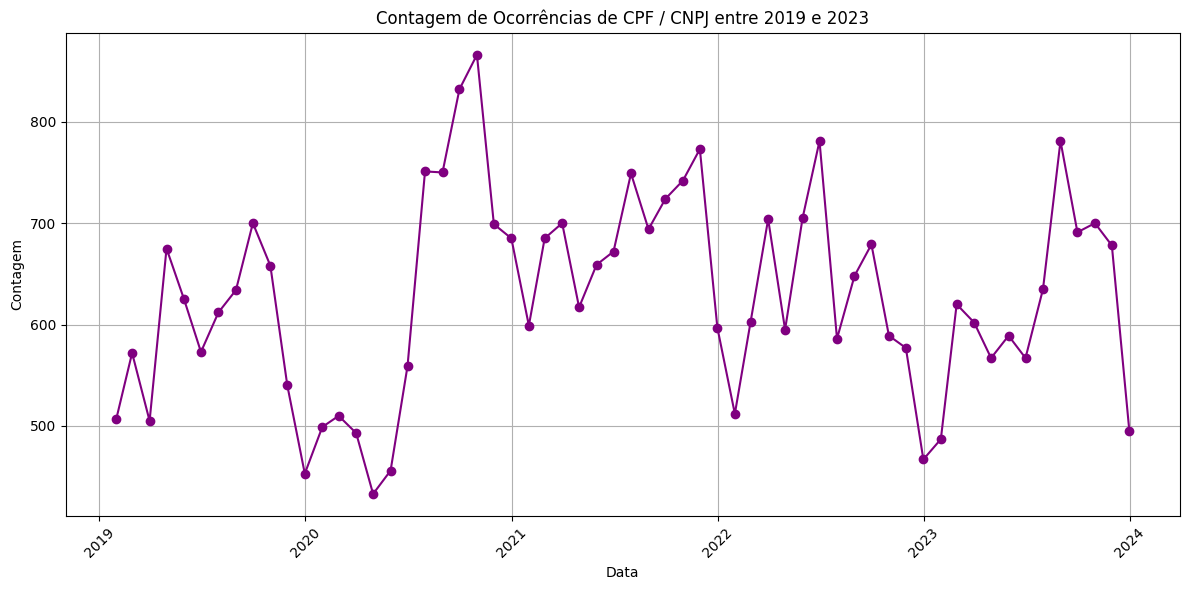

In [ ]:
# Seleciona o intervalo de datas específicas
ts2 = ts['2019-01-01':'2023-12-31']
ts_datas = ts2

# Plota a série temporal no intervalo selecionado
plt.figure(figsize=(12, 6))  # Define o tamanho da figura
plt.plot(ts_datas, marker='o', linestyle='-', color='purple')  # Plota com marcadores e linha contínua
plt.title('Contagem de Ocorrências de CPF / CNPJ entre 2019 e 2023')  # Título do gráfico
plt.xlabel('Data')  # Rótulo do eixo X
plt.ylabel('Contagem')  # Rótulo do eixo Y
plt.grid(True)  # Adiciona uma grade ao gráfico
plt.xticks(rotation=45)  # Rotaciona as etiquetas do eixo X para melhor legibilidade
plt.tight_layout()  # Ajusta o layout para evitar sobreposição de elementos
plt.show()  # Exibe o gráfico

# Exibe a série temporal selecionada
#ts_datas


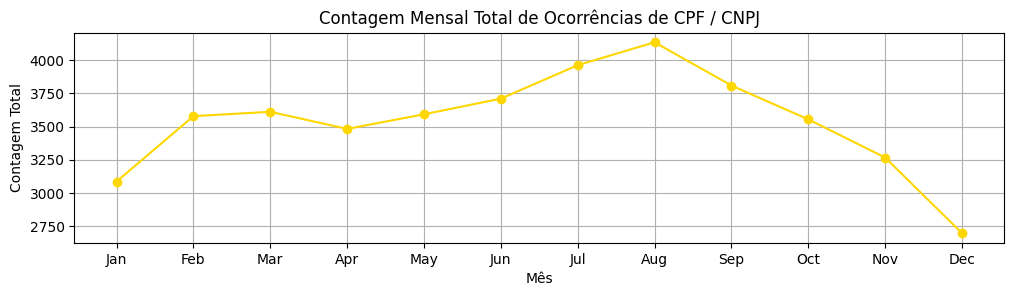

In [ ]:
# Contagem total de ocorrências de CNPJ por mês
ts = df[' CPF / CNPJ'].resample('M').count()
ts2 = ts['2019-01-01':'2023-12-31']
ts_datas = ts2

# Agrupa a série temporal por mês e soma as ocorrências
ts_mes = ts.groupby(ts.index.month).sum()

# Plotando a contagem total mensal
plt.figure(figsize=(12, 6))  # Define o tamanho da figura
plt.subplot(2, 1, 1)  # Cria uma subplot na posição (2, 1, 1)
plt.plot(ts_mes, marker='o', linestyle='-', color='gold')  # Plota com marcadores e linha contínua
plt.title('Contagem Mensal Total de Ocorrências de CPF / CNPJ')  # Título do gráfico
plt.xlabel('Mês')  # Rótulo do eixo X
plt.ylabel('Contagem Total')  # Rótulo do eixo Y
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])  # Rótulos dos meses
plt.grid(True)  # Adiciona uma grade ao gráfico

# ANÁLISE ANUAL

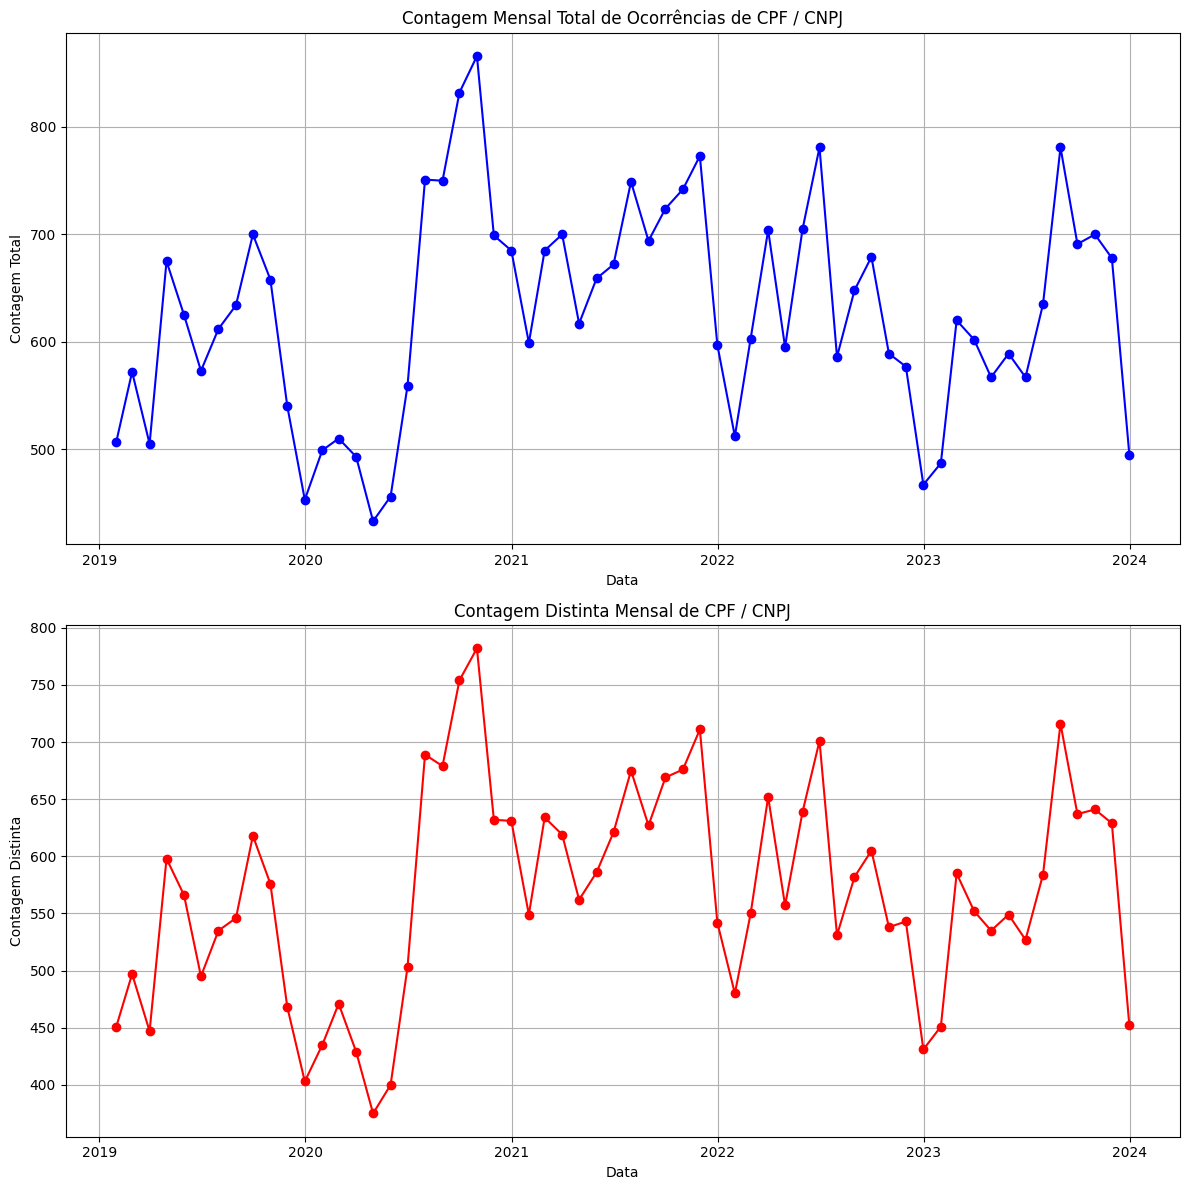

In [ ]:
# Contagem total de ocorrências de 'CPF / CNPJ' por mês
ts_total = df[' CPF / CNPJ'].resample('M').count()

# Agrupa a série temporal por mês e soma as ocorrências
ts_mes = ts_total.groupby(ts_total.index.month).sum()
ts_filtered1 = ts_total['2019-01-01':'2023-12-31']

# Plotando a contagem total mensal
plt.figure(figsize=(12, 12))  # Define o tamanho da figura

# Subplot 1: Contagem total mensal
plt.subplot(2, 1, 1)
plt.plot(ts_filtered1, marker='o', linestyle='-', color='b')
plt.title('Contagem Mensal Total de Ocorrências de CPF / CNPJ')
plt.xlabel('Data')
plt.ylabel('Contagem Total')
plt.grid(True)


# Contagem distinta de 'CPF / CNPJ' por mês e seleciona o intervalo desejado.
ts_distinct = df[' CPF / CNPJ'].resample('M').nunique()
ts_filtered2 = ts_distinct['2019-01-01':'2023-12-31']

# Subplot 2: Contagem distinta mensal
plt.subplot(2, 1, 2)
plt.plot(ts_filtered2, marker='o', linestyle='-', color='r')
plt.title('Contagem Distinta Mensal de CPF / CNPJ')
plt.xlabel('Data')
plt.ylabel('Contagem Distinta')
plt.grid(True)

plt.tight_layout()  # Ajusta o layout para evitar sobreposição de elementos
plt.show()  # Exibe o gráfico

In [ ]:
# Exibe as séries temporais mensais
print("Contagem total mensal:\n", ts_total)

Contagem total mensal:
 DT_Alocacao
2019-01-31    507
2019-02-28    572
2019-03-31    505
2019-04-30    675
2019-05-31    625
             ... 
2024-05-31    559
2024-06-30    559
2024-07-31    630
2024-08-31    629
2024-09-30    184
Freq: M, Name:  CPF / CNPJ, Length: 69, dtype: int64


In [ ]:
print("\nContagem distinta mensal:\n", ts_distinct)


Contagem distinta mensal:
 DT_Alocacao
2019-01-31    451
2019-02-28    497
2019-03-31    447
2019-04-30    598
2019-05-31    566
             ... 
2024-05-31    525
2024-06-30    515
2024-07-31    581
2024-08-31    585
2024-09-30    178
Freq: M, Name:  CPF / CNPJ, Length: 69, dtype: int64


In [ ]:
print('Contagem Total Com Repetições\n',round(df.groupby([' CPF / CNPJ']).count()).sum())

Contagem Total Com Repetições
  NM_Consorciado    39812
 DT_Nascimento     36049
 ST_SEXO           39812
Idade              36049
dtype: int64
